## Feature Selection Technique 


- I/P and O/P - Categorial - Chi-square Test / Mutual Information




- I/P and O/P - Numerical - Pearson correlation Co-Efficient / Spearman rank Correlation




- I/P categorial and O/P numerical - Anova / Kendall rank Co-efficient




- I/P numerical and O/P categorial - Anova / Kendall rank Co-efficient 



In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [37]:
from sklearn.datasets import load_boston
data=load_boston()
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
df.shape

(506, 13)

### 1.  Correlation Matrix 

<AxesSubplot:>

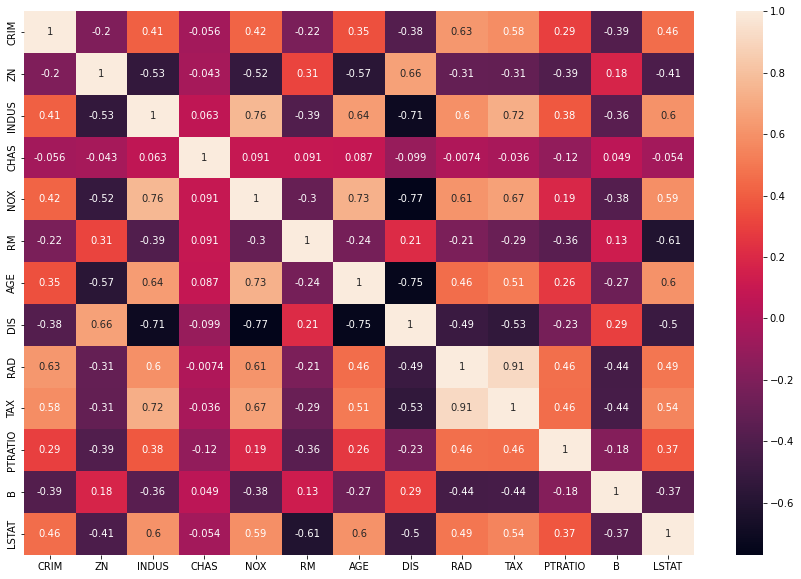

In [38]:
corr_matrix=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True)

# any values having high value are highly correlated to each other.

### 2. Variance Threshold 

In [39]:
# Check the variance of all the features any features having variance 
# less than the defined threshold can be removed.

from sklearn.feature_selection import VarianceThreshold
var=VarianceThreshold(threshold=2)
var.fit(df)

VarianceThreshold(threshold=2)

In [46]:
# Returns 10 columns having variance greater than 2.

df.columns[var.get_support()]

Index(['CRIM', 'ZN', 'INDUS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

### 3.  Chi-Square Test  - chi2 

In [66]:
from sklearn.feature_selection import chi2,f_classif
from sklearn.feature_selection import SelectKBest,SelectPercentile

In [113]:
from sklearn.datasets import load_iris
iris_data=load_iris()
iris=pd.DataFrame(data=iris_data.data,columns=iris_data.feature_names)
iris['target']=iris_data['target']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [114]:
X=iris.drop(columns=['target'],axis=1)
y=iris['target']

### Can use SelectKBest or SelectPercentile 

In [115]:

# Define the no of features required
# On basis of chisquare values select the 2 best features.

chi2_selector=SelectKBest(score_func=chi2,k=2)
K_best=chi2_selector.fit_transform(X,y)



In [116]:
# Only 2 best Features are selected 
K_best.shape

(150, 2)

In [121]:
chi2_scores = pd.DataFrame(list(zip(iris.columns,
                                   chi2_selector.scores_)),
                          columns=['feature','score'])
chi2_scores

,feature,score
0,sepal length (cm),10.817821
1,sepal width (cm),3.710728
2,petal length (cm),116.312613
3,petal width (cm),67.048360


In [123]:
# 2 Features selected based on scores.
np.asarray(iris_data.feature_names)[chi2_selector.get_support()]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

###  4.  Anova Test  -   f_classif

In [124]:
# Define the no of features required
# On basis of f-classif values it will select the best features .

anova_selector=SelectKBest(f_classif,k=3)
K_best=anova_selector.fit_transform(X,y)

In [125]:
# Only 2 best Features are selected 
K_best.shape

(150, 3)

In [129]:
anova_scores = pd.DataFrame(list(zip(iris.columns,
                                   anova_selector.scores_)),
                          columns=['feature','score'])
anova_scores

,feature,score
0,sepal length (cm),119.264502
1,sepal width (cm),49.160040
2,petal length (cm),1180.161182
3,petal width (cm),960.007147


In [130]:
# 2 Features selected based on scores.
np.asarray(iris_data.feature_names)[anova_selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

### 5.   Information Gain 

In [128]:
from sklearn.feature_selection import mutual_info_classif

In [99]:
feature_scores=mutual_info_classif(X,y,random_state=0)
(feature_scores)

array([0.47387323, 0.28607228, 0.98958517, 0.97493797])

In [132]:
feature_info=pd.Series(feature_scores)
feature_info.index=X.columns
feature_info

sepal length (cm)    0.473873
sepal width (cm)     0.286072
petal length (cm)    0.989585
petal width (cm)     0.974938
dtype: float64

### THE END 